In [3]:
# Import libralies
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

root_path = '/content/drive/MyDrive/Codes/Riemannian-interior-point-trust-region-method'

Mounted at /content/drive


In [5]:
# Set variables
problem_name = "Rosenbrock"

solver_name = ["RALM_SteepestDescent", "RSQO_reghess", "RIPM_RepMat", "RIPTRM_Exact_RepMat", "RIPTRM_tCG"]

# solver_name = ["RIPTRM_tCG", "RIPTRM_Exact_RepMat", "RALM_SteepestDescent", "RIPM_RepMat", "RSQO_reghess"]
# solver_name = ["RIPTRM",  "RALM", "RIPM", "RSQO"]

# Paul Tol's color-blind-friendly palette
tol_colors = ["#4477AA", "#66CCEE", "#228833", "#CCBB44", "#EE6677", "#AA3377", "#BBBBBB"]
# tol_colors = ["#4477AA", "#66CCEE", "#228833", "#EE6677", "#AA3377", "#BBBBBB"]

In [6]:
# Preliminaries

def set_display_name(solver_name):
  if solver_name == "RIPTRM_tCG":
    return "RIPTRM (tCG)"
  elif solver_name == "RIPTRM_Exact_RepMat":
    return "RIPTRM (exact)"
  elif solver_name == "RALM_SteepestDescent":
    return "RALM"
  elif solver_name == "RSQO_reghess":
    return "RSQO"
  elif solver_name == "RIPM_RepMat":
    return "RIPM"

def set_xlabel(xaxis_col_name=None):
  if xaxis_col_name == None:
    return "Step"
  elif xaxis_col_name == "time":
    return "Time (sec)"

def set_ylabel(yaxis_col_name, is_y_logscale):
  ylabel = None
  if yaxis_col_name == "residual":
    ylabel = "KKT residual"
  elif yaxis_col_name == "second_order_residual":
    ylabel = r"$\text{Min. eigenvalue of } \text{Hess}_{x}\mathcal{L} \text{ over } C_{\text{w}}$"
    # ylabel = "2nd-order residual"
  if is_y_logscale:
    ylabel = ylabel + " (log10 scale)"
  return ylabel

def set_color(solver_name):
  tol_colors = ["#4477AA", "#66CCEE", "#228833", "#CCBB44", "#EE6677", "#AA3377", "#BBBBBB"]
  if solver_name == "RIPTRM_tCG":
    return tol_colors[5]
  elif solver_name == "RIPTRM_Exact_RepMat":
    return tol_colors[4]
  elif solver_name == "RALM_SteepestDescent":
    return tol_colors[0]
  elif solver_name == "RSQO_reghess":
    return tol_colors[1]
  elif solver_name == "RIPM_RepMat":
    return tol_colors[2]


          residual
0     2.000000e+07
1     6.119109e+02
2     9.220366e+01
3     4.739361e+00
4     1.323092e+01
...            ...
1103  7.358086e+00
1104  7.840083e+00
1105  3.025556e+00
1106  5.419756e+00
1107  1.028641e+01

[1108 rows x 1 columns]
          residual
0     2.000000e+07
1     2.460837e+05
2     1.391951e+05
3     2.610659e+03
4     5.982572e+03
...            ...
3223  5.599407e-02
3224  1.753560e-02
3225  1.724848e-02
3226  1.602052e-02
3227  1.747122e-02

[3228 rows x 1 columns]
          residual
0     2.000000e+07
1     9.874242e+06
2     7.402180e+06
3     6.484356e+06
4     3.611815e+06
...            ...
2485  2.186876e+06
2486  2.186876e+06
2487  2.186875e+06
2488  2.186875e+06
2489  2.186875e+06

[2490 rows x 1 columns]


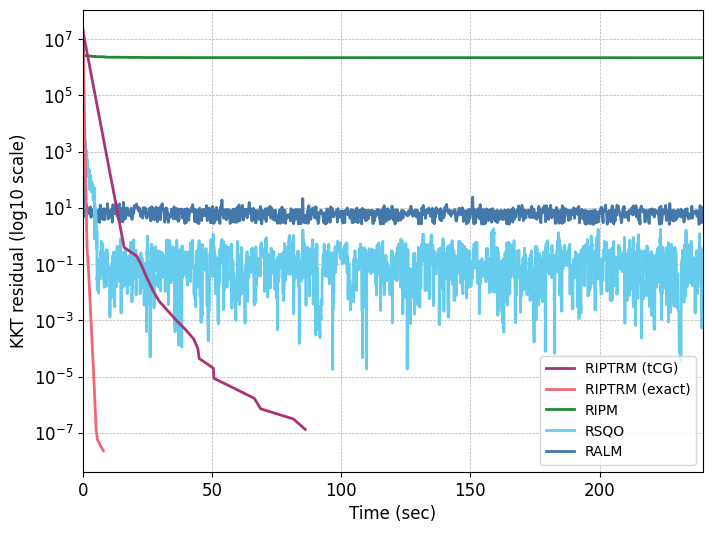

In [9]:
# Graph plot

# Collect information from '{solver}_log.csv' with a specific instance and a fixed initial point
# problem_name = "StableIdentification"
problem_instance = 1
problem_initialpoint = "a"
# solver_name = ["RIPTRM_tCG", "RIPTRM_Exact_RepMat", "RALM_SteepestDescent", "RIPM_RepMat", "RSQO_reghess"]
file_name = "log"

xaxis_col_name = "time"
yaxis_col_name = "residual"
is_y_logscale = True

# plot_graph(problem_name, problem_instance, problem_initialpoint, solver_name, file_name, yaxis_col_name, xaxis_col_name, is_ylogscale)

# Initial setting
plt.figure(figsize=(8, 6))
# plt.title(f"{xaxis_col_name} vs {yaxis_col_name} for {problem_name}-{problem_instance}-{problem_initialpoint}")
plt.ylabel(f"{yaxis_col_name}")

# # Paul Tol's bright color-blind-friendly palette
# tol_colors = ["#4477AA", "#66CCEE", "#228833", "#CCBB44", "#EE6677", "#AA3377", "#BBBBBB"]

# Collect information
load_path = f"{root_path}/intermediate/{problem_name}/{problem_instance}/{problem_initialpoint}"
for i, solver in enumerate(solver_name):
    # load the basic file
    log = pd.read_csv(f"{load_path}/{solver}_{file_name}.csv")

    # load the y-axis column
    if solver == "RIPTRM_tCG" or solver == "RIPTRM_Exact_RepMat":
      log = log[(log["inner_status"] == "converged") | (log["inner_status"].isna())]
      # log = log[(log["inner_status"] == "converged") | (log["inner_status"] == "successful") | (log["inner_status"].isna())]
      yloaded = log.loc[:,yaxis_col_name]
      yloaded = yloaded.to_frame()
      yloaded.columns = [solver]
    else:
      yloaded = log.loc[:,yaxis_col_name]
      yloaded = yloaded.to_frame()
      print(yloaded)
      yloaded.columns = [solver]

    xloaded = log.loc[:,xaxis_col_name]
    xloaded = xloaded.to_frame()
    xloaded.columns = [solver]
    color = set_color(solver)
    display_name = set_display_name(solver)
    plt.plot(xloaded, yloaded, label=display_name, color=color, linestyle="-", linewidth=2)


# # set x, y, display names
# display_name = set_display_name(solver)
xlabel = set_xlabel(xaxis_col_name)
ylabel = set_ylabel(yaxis_col_name, is_y_logscale)
plt.xlabel(xlabel, fontsize="large")
plt.ylabel(ylabel, fontsize="large")

plt.tick_params(axis="x", labelsize="large")
plt.tick_params(axis="y", labelsize="large")
    # # load the x-axis column
    # if xaxis_col_name is None:
    #     # plt.xlabel(f"step")
    #     # If not specified, then use the index as the x-axis
    #     plt.plot(yloaded, label=display_name, color=tol_colors[i % len(tol_colors)], linestyle="-", linewidth=2)
    # else:
    #     plt.xlabel(f"{xaxis_col_name}")
    #     xloaded = log.loc[:,xaxis_col_name]
    #     xloaded = xloaded.to_frame()
    #     xloaded.columns = [solver]
    #     plt.plot(xloaded, yloaded, label=display_name, color=tol_colors[i % len(tol_colors)], linestyle="-", linewidth=2)

# Set the legend, grid, and y-axis scale
# plt.legend(title="Solver", loc="upper right", fontsize="medium", title_fontsize="large")
plt.legend(loc="lower right",  title_fontsize="large", fontsize="large")
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1])  # 順序を逆にしてlegendに渡す
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
if is_y_logscale:
    plt.yscale("log")

# plt.gca().set_ylim(top=10)
plt.gca().set_xlim(left=0, right=240)

# Save the plot
output_folder = f'{root_path}/result/{problem_name}/{problem_instance}/{problem_initialpoint}'
os.makedirs(f"{root_path}/result/{problem_name}", exist_ok=True)
os.makedirs(f"{root_path}/result/{problem_name}/{problem_instance}", exist_ok=True)
os.makedirs(output_folder, exist_ok=True)  # create {problem_name} folder under 'result' folder
# plt.savefig(f"{output_folder}/{xaxis_col_name}_{yaxis_col_name}.pdf", bbox_inches="tight")
plt.savefig(f"{output_folder}/{xaxis_col_name}_{yaxis_col_name}_outer.pdf", bbox_inches="tight")

      iteration        time          cost  distance      residual  \
0             0    0.000000  5.000001e+07  0.000000  2.000000e+07   
1             1    0.392666  4.000001e+07  1.546577  6.119109e+02   
2             2    0.768841  4.000001e+07  0.003043  9.220366e+01   
3             3    1.146467  4.000001e+07  0.015598  4.739361e+00   
4             4    1.383005  4.000001e+07  0.000087  1.323092e+01   
...         ...         ...           ...       ...           ...   
1103       1103  239.170766  4.000001e+07  0.000084  7.358086e+00   
1104       1104  239.413566  4.000001e+07  0.000081  7.840083e+00   
1105       1105  239.676155  4.000001e+07  0.000073  3.025556e+00   
1106       1106  239.939171  4.000001e+07  0.000082  5.419756e+00   
1107       1107  240.012383  4.000001e+07  0.000021  1.028641e+01   

          gradnorm  complviolation  dualviolation  manviolation  maxviolation  \
0     2.000000e+07        1.749714            0.0             0             0   
1     6.1

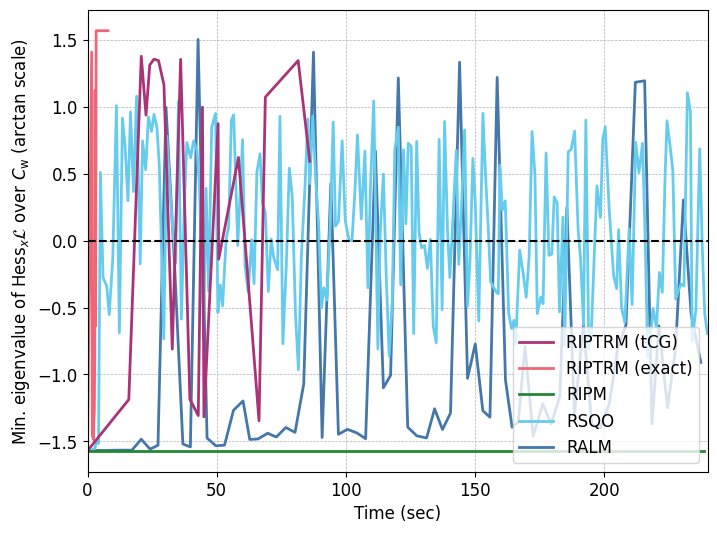

In [10]:
# Graph plot

# Collect information from '{solver}_log.csv' with a specific instance and a fixed initial point
# problem_name = "StableIdentification"
problem_instance = 1
problem_initialpoint = "a"
# solver_name = ["RIPTRM_tCG", "RIPTRM_Exact_RepMat", "RALM_SteepestDescent", "RIPM_RepMat", "RSQO_reghess"]
file_name = "log"

xaxis_col_name = "time"
yaxis_col_name = "second_order_residual"
is_y_logscale = False

# solver_name = ["RIPTRM_tCG", "RIPTRM_Exact_RepMat"]
# solver_name = ["RIPTRM_tCG", "RIPTRM_Exact_RepMat", "RALM_SteepestDescent", "RIPM_RepMat", "RSQO_reghess"]
# solver_name = ["RALM_SteepestDescent"]

# plot_graph(problem_name, problem_instance, problem_initialpoint, solver_name, file_name, yaxis_col_name, xaxis_col_name, is_ylogscale)

# Initial setting
plt.figure(figsize=(8, 6))
# plt.title(f"{xaxis_col_name} vs {yaxis_col_name} for {problem_name}-{problem_instance}-{problem_initialpoint}")
plt.ylabel(f"{yaxis_col_name}")

# # Paul Tol's bright color-blind-friendly palette
# tol_colors = ["#4477AA", "#66CCEE", "#228833", "#CCBB44", "#EE6677", "#AA3377", "#BBBBBB"]

# Collect information
load_path = f"{root_path}/intermediate/{problem_name}/{problem_instance}/{problem_initialpoint}"
for i, solver in enumerate(solver_name):
    # load the basic file
    log = pd.read_csv(f"{load_path}/{solver}_{file_name}.csv")

    # load the y-axis column
    if solver == "RIPTRM_tCG" or solver == "RIPTRM_Exact_RepMat":
      log = log[(log["inner_status"] == "converged") | (log["inner_status"].isna())]
      # log = log[(log["inner_status"] == "converged") | (log["inner_status"] == "successful") | (log["inner_status"].isna())]
      yloaded = log.loc[:,yaxis_col_name]
      yloaded = yloaded.to_frame()
      yloaded.columns = [solver]
    else:

      # 100ステップごとのグループを作成
      log["step_group"] = (np.arange(len(log)) // 15)
      print(log)
      log = log.loc[log.groupby("step_group")["time"].idxmin()]
      # 小数点を切り捨てて整数部分を取得
      # log["int_value"] = np.ceil(log["time"]).astype(int)
      # 各整数部分ごとに最も早いタイムスタンプの行を取得
      # log = log.loc[log.groupby("int_value")["time"].idxmax()]
      yloaded = log.loc[:,yaxis_col_name]
      yloaded = yloaded.to_frame()
      print(yloaded)
      yloaded.columns = [solver]

    # load the y-axis column
    yloaded = log.loc[:,yaxis_col_name]
    # yloaded = yloaded.apply(lambda x: min(0, x))
    yloaded = yloaded.apply(np.arctan)
    yloaded = yloaded.to_frame()
    yloaded.columns = [solver]

    # set x, y, display names
    display_name = set_display_name(solver)


    color = set_color(solver)

    # load the x-axis column
    if xaxis_col_name is None:
        # plt.xlabel(f"step")
        # If not specified, then use the index as the x-axis
        plt.plot(yloaded, label=display_name, color=color, linestyle="-", linewidth=2)
    else:
        plt.xlabel(f"{xaxis_col_name}")
        xloaded = log.loc[:,xaxis_col_name]
        xloaded = xloaded.to_frame()
        xloaded.columns = [solver]
        plt.plot(xloaded, yloaded, label=display_name, color=color, linestyle="-", linewidth=2)

xlabel = set_xlabel(xaxis_col_name)
ylabel = set_ylabel(yaxis_col_name, is_y_logscale)
ylabel = ylabel + " (arctan scale)"
plt.xlabel(xlabel, fontsize="large")
plt.ylabel(ylabel, fontsize="large")
plt.tick_params(axis="x", labelsize="large")
plt.tick_params(axis="y", labelsize="large")

plt.axhline(0, color="black", linestyle="--", linewidth=1.5)

# Set the legend, grid, and y-axis scale
# plt.legend(title="Solver", loc="upper right", fontsize="medium", title_fontsize="large")

# handles, labels = plt.gca().get_legend_handles_labels()
# plt.legend(loc="lower right", fontsize="large", title_fontsize="large")
# plt.legend(handles[::-1], labels[::-1])  # 順序を逆にしてlegendに渡す
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc="lower right", fontsize="large", title_fontsize="large")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
if is_y_logscale:
    plt.yscale("log")

plt.gca().set_xlim(left=0, right=240)
# plt.gca().set_ylim(top=100, bottom=-20)

# Save the plot
output_folder = f'{root_path}/result/{problem_name}/{problem_instance}/{problem_initialpoint}'
os.makedirs(f"{root_path}/result/{problem_name}", exist_ok=True)
os.makedirs(f"{root_path}/result/{problem_name}/{problem_instance}", exist_ok=True)
os.makedirs(output_folder, exist_ok=True)  # create {problem_name} folder under 'result' folder
# plt.savefig(f"{output_folder}/{xaxis_col_name}_{yaxis_col_name}.pdf", bbox_inches="tight")
# plt.savefig(f"{output_folder}/{xaxis_col_name}_{yaxis_col_name}_1sec.pdf", bbox_inches="tight")
# plt.savefig(f"{output_folder}/{xaxis_col_name}_{yaxis_col_name}_outer.pdf", bbox_inches="tight")
plt.savefig(f"{output_folder}/{xaxis_col_name}_{yaxis_col_name}_outer_step.pdf", bbox_inches="tight")